## DIS BENCHMARK EXPERIMENT WITH 30 ITERATIONS 
### 1 message / millisecond
---

#### Loading Data

In [1]:
import pandas as pd
import os
import re

def analyze_benchmark_metrics(sender_folder, receiver_folder):
    
    results = []
    pattern = re.compile(r'(dis|proto)-(sender|receiver)-metrics-(\d+)\.csv')
      
    # group files for iteration
    files = {}
    for folder, role in [(sender_folder, 'sender'), (receiver_folder, 'receiver')]:
        for filename in os.listdir(folder):
            match = pattern.match(filename)
            if match:
                protocol, file_role, iteration = match.group(1), match.group(2), int(match.group(3))
                files.setdefault(protocol, {}).setdefault(iteration, {})[file_role] = os.path.join(folder, filename)
    
    # process iteration
    for protocol in files:
        for iteration in sorted(files[protocol].keys()):
            if 'sender' not in files[protocol][iteration] or 'receiver' not in files[protocol][iteration]:
                continue
            
            # read files in iteration
            sender_df = pd.read_csv(files[protocol][iteration]['sender'])
            receiver_df = pd.read_csv(files[protocol][iteration]['receiver'])
            
            # encoding/deconding metrics
            encoding_time_mean = sender_df['Encoding_Time'].mean()
            encoding_time_std = sender_df['Encoding_Time'].std()
            decoding_time_mean = receiver_df['Decoding_Time'].mean()
            decoding_time_std = receiver_df['Decoding_Time'].std()
                        
            # iteration time in sec
            total_time = (receiver_df['Received_Time'].max() - sender_df['Sent_Time'].min()) / 1000
            
            # throughput
            throughput = len(sender_df) / total_time
            
            # message size
            message_size_mean = sender_df['Size_In_Bytes'].mean()
            message_size_std = sender_df['Size_In_Bytes'].std()
            
            # package loss
            packets_sent = len(sender_df)
            packets_received = len(receiver_df)
            packet_loss_percent = ((packets_sent - packets_received) / packets_sent * 100) if packets_sent > 0 else np.nan
            results.append({
                'Protocol': protocol.upper(),
                'Iteration': iteration,
                'Encoding_Time_Mean': encoding_time_mean,
                'Encoding_Time_Std': encoding_time_std,
                'Decoding_Time_Mean': decoding_time_mean,
                'Decoding_Time_Std': decoding_time_std,
                'Throughput': throughput,
                'Message_Size_Mean': message_size_mean,
                'Message_Size_Std': message_size_std,
                'Packet_Loss_Percent': packet_loss_percent,
                'Total_Time': total_time
            })
    
    # build dataframe
    result_df = pd.DataFrame(results)
    if not result_df.empty:
        result_df = result_df.sort_values(['Protocol', 'Iteration'])
        numeric_cols = [
            'Encoding_Time_Mean', 'Encoding_Time_Std', 'Decoding_Time_Mean', 'Decoding_Time_Std',
            'Throughput', 'Message_Size_Mean', 'Message_Size_Std',
            'Packet_Loss_Percent', 'Total_Time'
        ]
        result_df[numeric_cols] = result_df[numeric_cols].round(4)
    
    return result_df

#### Checking Raw Data

In [2]:
dis_benchmark = analyze_benchmark_metrics("./data/dis/sender", "./data/dis/receiver")
dis_benchmark

,Protocol,Iteration,Encoding_Time_Mean,Encoding_Time_Std,Decoding_Time_Mean,Decoding_Time_Std,Throughput,Message_Size_Mean,Message_Size_Std,Packet_Loss_Percent,Total_Time
0,DIS,1,0.0112,0.0071,0.0137,0.0098,859.8333,1280.0,0.0,0.0000,139.5619
1,DIS,2,0.0106,0.0066,0.0137,0.0087,865.6893,1280.0,0.0,0.0000,138.6179
2,DIS,3,0.0112,0.0065,0.0139,0.0096,861.8786,1280.0,0.0,0.0000,139.2307
3,DIS,4,0.0112,0.0072,0.0139,0.0111,859.5778,1280.0,0.0,0.0000,139.6034
4,DIS,5,0.0115,0.0071,0.0138,0.0112,859.1001,1280.0,0.0,0.0000,139.6810
5,DIS,6,0.0113,0.0081,0.0135,0.0116,859.5349,1280.0,0.0,0.0000,139.6104
6,DIS,7,0.0108,0.0066,0.0139,0.0143,863.9861,1280.0,0.0,0.0000,138.8911
7,DIS,8,0.0112,0.0070,0.0138,0.0091,860.7482,1280.0,0.0,0.0000,139.4136
8,DIS,9,0.0114,0.0068,0.0139,0.0095,858.8993,1280.0,0.0,0.0000,139.7137
9,DIS,10,0.0114,0.0069,0.0136,0.0094,860.9268,1280.0,0.0,0.0000,139.3847


In [3]:
proto_benchmark = analyze_benchmark_metrics("./data/proto/sender", "./data/proto/receiver")
proto_benchmark

,Protocol,Iteration,Encoding_Time_Mean,Encoding_Time_Std,Decoding_Time_Mean,Decoding_Time_Std,Throughput,Message_Size_Mean,Message_Size_Std,Packet_Loss_Percent,Total_Time
0,PROTO,1,0.0151,0.0219,0.0060,0.0314,853.6875,166.0000,0.0000,0.0,140.5667
1,PROTO,2,0.0157,0.0206,0.0059,0.0287,855.0799,166.0000,0.0000,0.0,140.3378
2,PROTO,3,0.0155,0.0208,0.0062,0.0309,855.6988,166.0000,0.0000,0.0,140.2363
3,PROTO,4,0.0157,0.0203,0.0064,0.0291,854.2467,166.0000,0.0000,0.0,140.4746
4,PROTO,5,0.0154,0.0218,0.0057,0.0286,855.3372,166.0000,0.0000,0.0,140.2955
5,PROTO,6,0.0160,0.0206,0.0063,0.0279,853.5757,166.0000,0.0000,0.0,140.5851
6,PROTO,7,0.0158,0.0214,0.0058,0.0286,853.3552,166.0000,0.0000,0.0,140.6214
7,PROTO,8,0.0164,0.0207,0.0057,0.0274,852.6760,166.0000,0.0000,0.0,140.7334
8,PROTO,9,0.0157,0.0233,0.0058,0.0338,855.4600,166.0000,0.0000,0.0,140.2754
9,PROTO,10,0.0157,0.0221,0.0056,0.0275,855.9321,166.0000,0.0000,0.0,140.1980


#### Comparing Throughput, Message Size, Packet Loss, And Duration

In [4]:
# throughout
dis_throughput_mean = dis_benchmark['Throughput'].mean()
proto_throughput_mean = proto_benchmark['Throughput'].mean()

# message size
dis_message_size_mean = dis_benchmark['Message_Size_Mean'].mean()
proto_message_size_mean = proto_benchmark['Message_Size_Mean'].mean()

# packet loss
dis_package_loss_mean = dis_benchmark['Packet_Loss_Percent'].mean()
proto_package_loss_mean = proto_benchmark['Packet_Loss_Percent'].mean()

# duration
dis_duration_mean = dis_benchmark['Total_Time'].mean()
proto_duration_mean = proto_benchmark['Total_Time'].mean()

# results table
experiment_data = {
    'Protocol': ['DIS', 'PROTO', 'Diff'],
    'Throughput (msg/sec)': [dis_throughput_mean, proto_throughput_mean, f"{(dis_throughput_mean - proto_throughput_mean):.2f}%"],
    'Message Size (bytes)': [dis_message_size_mean, f"{(proto_message_size_mean):.1f}", f"{(dis_message_size_mean / proto_message_size_mean):.2f}x"],
    'Packet Loss (%)': [dis_package_loss_mean, proto_package_loss_mean, f"{((1 - (dis_package_loss_mean / proto_package_loss_mean)) * 100):.2f}%"],
    'Experiment Duration (sec)': [dis_duration_mean, proto_duration_mean, f"{((1 - (dis_duration_mean / proto_duration_mean)) * 100):.2f}%"]
}
experiment_df = pd.DataFrame(experiment_data)

# display table
experiment_df

C:\Users\coter\AppData\Local\Temp\ipykernel_19940\2733052877.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  'Packet Loss (%)': [dis_package_loss_mean, proto_package_loss_mean, f"{((1 - (dis_package_loss_mean / proto_package_loss_mean)) * 100):.2f}%"],


,Protocol,Throughput (msg/sec),Message Size (bytes),Packet Loss (%),Experiment Duration (sec)
0,DIS,861.543633,1280.0,0.003417,139.285563
1,PROTO,854.326003,165.9,0.0,140.461793
2,Diff,7.22%,7.72x,-inf%,0.84%


#### Comparing Encoding And Decoding Time

In [9]:
# encoding time
dis_encoding_time_mean = dis_benchmark['Encoding_Time_Mean'].mean()
dis_encoding_time_std = dis_benchmark['Encoding_Time_Std'].mean()
proto_encoding_time_mean = proto_benchmark['Encoding_Time_Mean'].mean()
proto_encoding_time_std = proto_benchmark['Encoding_Time_Std'].mean()

# decoding time
dis_decoding_time_mean = dis_benchmark['Decoding_Time_Mean'].mean()
dis_decoding_time_std = dis_benchmark['Decoding_Time_Std'].mean()
proto_decoding_time_mean = proto_benchmark['Decoding_Time_Mean'].mean()
proto_decoding_time_std = proto_benchmark['Decoding_Time_Std'].mean()

# results table
endecoding_data = {
  'Protocol': ['DIS', 'Protobuf', 'Diff', 'Diff (%)'],
  'Encoding Time (Mean)': [dis_encoding_time_mean, proto_encoding_time_mean, abs(dis_encoding_time_mean - proto_encoding_time_mean), f"{((proto_encoding_time_mean - dis_encoding_time_mean) / dis_encoding_time_mean * 100):.2f}%"],
  'Encoding Time (Std)': [dis_encoding_time_std, proto_encoding_time_std, abs(dis_encoding_time_std - proto_encoding_time_std), f"{((proto_encoding_time_std - dis_encoding_time_std) / dis_encoding_time_std * 100):.2f}%"],
  'Decoding Time (Mean)': [dis_decoding_time_mean, proto_decoding_time_mean, abs(dis_decoding_time_mean - proto_decoding_time_mean) ,f"{((proto_decoding_time_mean - dis_decoding_time_mean) / dis_decoding_time_mean * 100):.2f}%"],
  'Decoding Time (Std)': [dis_decoding_time_std, proto_decoding_time_std, abs(dis_decoding_time_std - proto_decoding_time_std) ,f"{((proto_decoding_time_std - dis_decoding_time_std) / dis_decoding_time_std * 100):.2f}%"]
}
endecoding_data_df = pd.DataFrame(endecoding_data)

# display table
endecoding_data_df

,Protocol,Encoding Time (Mean),Encoding Time (Std),Decoding Time (Mean),Decoding Time (Std)
0,DIS,0.01115,0.00708,0.013717,0.01042
1,Protobuf,0.015743,0.021517,0.005903,0.030943
2,Diff,0.004593,0.014437,0.007813,0.020523
3,Diff (%),41.20%,203.91%,-56.96%,196.96%


#### Comparing Encoding, Decoding Time And Message Size: Graphics

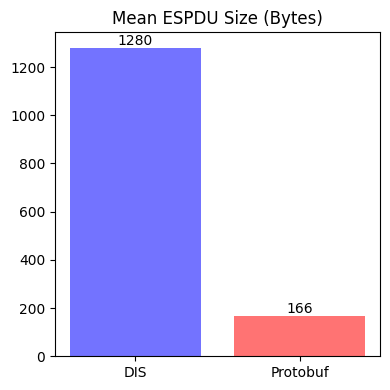

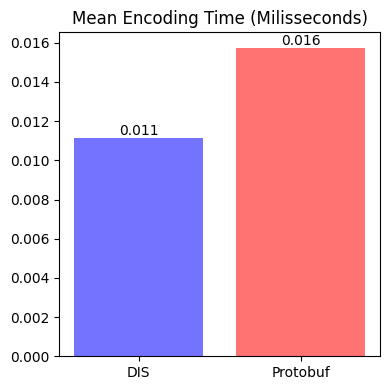

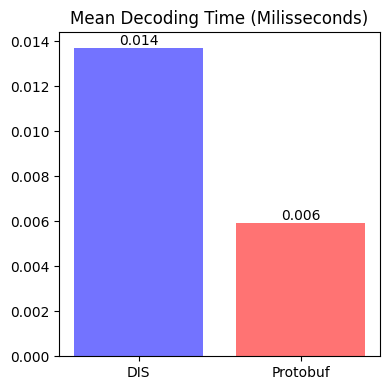

In [6]:
import matplotlib.pyplot as plt

# Mean ESPDU Size graph
fig1, ax1 = plt.subplots(figsize=(4, 4))
bars1 = ax1.bar(['DIS', 'Protobuf'], [dis_message_size_mean, proto_message_size_mean], color=['blue', 'red'], label="Size", alpha=0.55)
ax1.set_title("Mean ESPDU Size (Bytes)")
ax1.bar_label(bars1, fmt='%.0f')
plt.tight_layout()
plt.show()

# Mean Encoding Time graph
fig2, ax2 = plt.subplots(figsize=(4, 4))
bars2 = ax2.bar(['DIS', 'Protobuf'], [dis_encoding_time_mean, proto_encoding_time_mean], color=['blue', 'red'], label="Time", alpha=0.55)
ax2.set_title("Mean Encoding Time (Milisseconds)")
ax2.bar_label(bars2, fmt='%.3f')
plt.tight_layout()
plt.show()

# Mean Decoding Time graph
fig3, ax3 = plt.subplots(figsize=(4, 4))
bars3 = ax3.bar(['DIS', 'Protobuf'], [dis_decoding_time_mean, proto_decoding_time_mean], color=['blue', 'red'], label="Time", alpha=0.55)
ax3.set_title("Mean Decoding Time (Milisseconds)")
ax3.bar_label(bars3, fmt='%.3f')
plt.tight_layout()
plt.show()